Task 1 - import the libraries and load the dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('reviews.csv')
df.head()

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80


Task 2 - Basic data exploration

Category                   0
No Of Reviews              0
No Of Installs             0
Size                      28
Price                      0
Days since Last Update     0
Rating                     0
dtype: int64
[[<Axes: title={'center': 'No Of Reviews'}>
  <Axes: title={'center': 'No Of Installs'}>]
 [<Axes: title={'center': 'Size'}> <Axes: title={'center': 'Price'}>]
 [<Axes: title={'center': 'Days since Last Update'}>
  <Axes: title={'center': 'Rating'}>]]


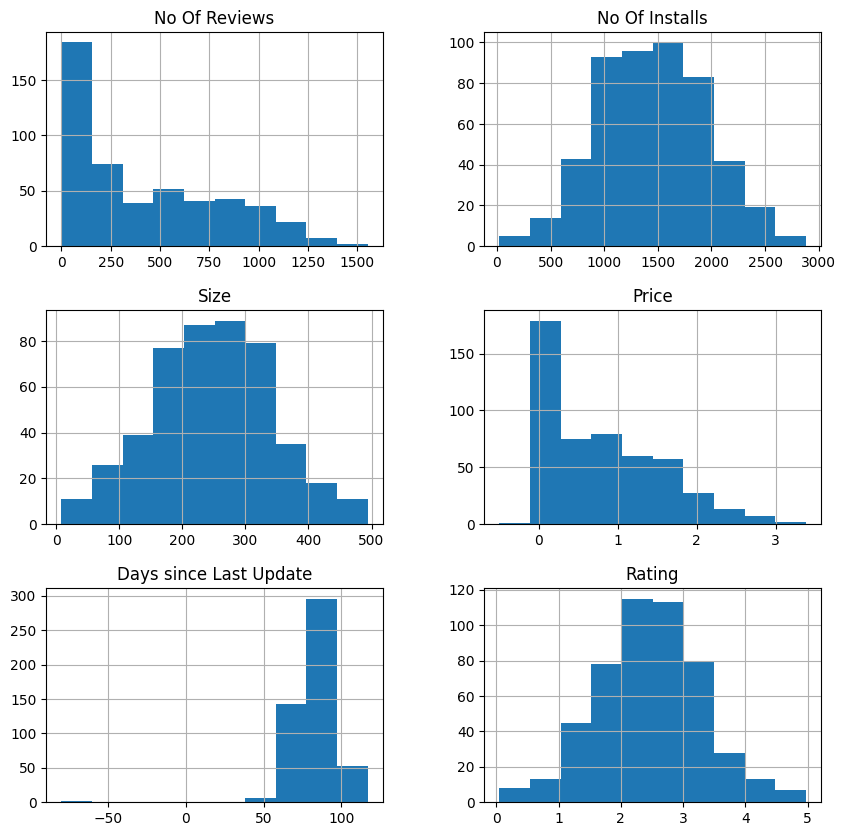

In [26]:
print(df.isnull().sum())
print(df.hist(figsize=(10,10)))

In [27]:
print(df.describe())

       No Of Reviews  No Of Installs        Size       Price  \
count     500.000000       500.00000  472.000000  500.000000   
mean      426.578000      1456.22200  247.870763    0.772200   
std       366.600332       506.51664   95.105050    0.752114   
min         0.000000        23.00000    8.000000   -0.500000   
25%       113.750000      1072.50000  184.000000    0.000000   
50%       273.000000      1447.50000  249.000000    0.645000   
75%       716.250000      1783.75000  312.250000    1.270000   
max      1552.000000      2880.00000  494.000000    3.380000   

       Days since Last Update      Rating  
count              500.000000  500.000000  
mean                83.274000    2.462260  
std                 14.960433    0.840859  
min                -80.000000    0.050000  
25%                 76.000000    1.907500  
50%                 84.000000    2.480000  
75%                 92.000000    3.020000  
max                117.000000    4.970000  


Task 3 - Check for invalid values

In [28]:
cond1 = df['Price'] < 0
df[cond1]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
1,productivity,155,1547,204.0,-0.5,72,2.07


In [29]:
cond2 = df['Days since Last Update'] < 0
df[cond2]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
11,productivity,201,2006,NaN,0.00,-68,1.91
88,games,59,587,335.0,1.58,-80,2.08


Task 4 - Remove invalid rows

In [30]:
cond1 = df['Price'] >= 0
cond2 = df['Days since Last Update'] >= 0
df = df[cond1 & cond2]
df.shape

(497, 7)

Task 5 - Split data into training and test subsets

In [31]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Task 6 - Check for correlation among features

In [32]:
# remove the 'Category' column from X_train and X_test
X_train.drop(['Category'], axis=1).corr()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update
No Of Reviews,1.000000,0.514130,-0.018121,-0.086976,-0.078577
No Of Installs,0.514130,1.000000,-0.004516,-0.018700,-0.054035
Size,-0.018121,-0.004516,1.000000,-0.038070,-0.002414
Price,-0.086976,-0.018700,-0.038070,1.000000,-0.031706
Days since Last Update,-0.078577,-0.054035,-0.002414,-0.031706,1.000000


Task 7 - Plot scatter plots

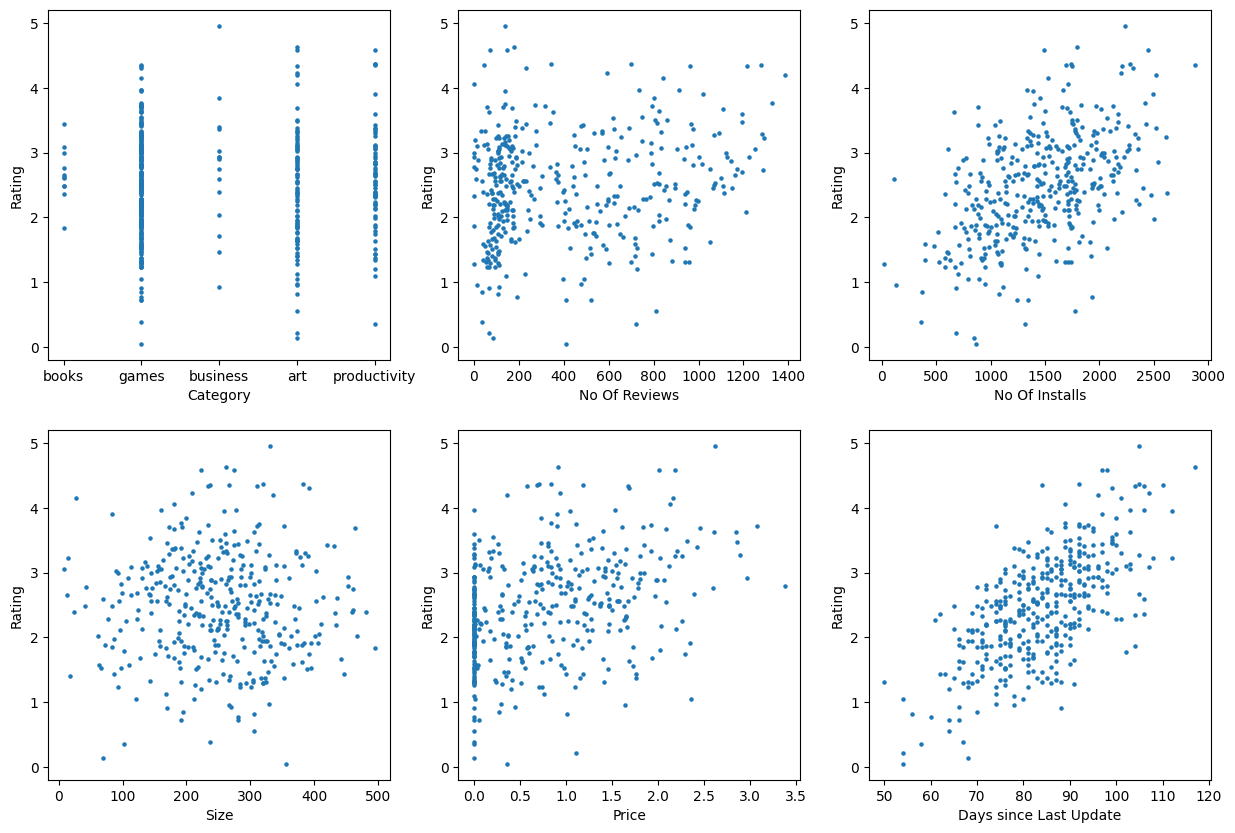

In [33]:
columns = ['Category', 'No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update']

i = 0

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for row in range(0, 2):
  for col in range(0, 3):
    axs[row, col].scatter(X_train[columns[i]], y_train, s = 5)
    axs[row, col].set_xlabel(columns[i])
    axs[row, col].set_ylabel('Rating')
    i += 1

Task 8 - Data preprocessing

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_col = ['No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update']
cat_col = ['Category']

imp = SimpleImputer(strategy='mean')
tf_num = imp.fit_transform(X_train[num_col])

scaler = StandardScaler()
tf_num = scaler.fit_transform(tf_num)

ohe = OneHotEncoder()
tf_cat = ohe.fit_transform(X_train[cat_col])

# concatenate the transformed columns
X_train_transformed = np.concatenate((tf_num, tf_cat.toarray()), axis=1)
print(X_train_transformed[0])

[-1.14922     1.1215984  -1.13561632  0.0732169   0.01224327  0.
  1.          0.          0.          0.        ]


Task 9 - Train our model

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_transformed, y_train)

print(model.coef_)
print(model.intercept_)

[-0.01263761  0.44527099  0.00512994  0.33109219  0.57813034 -0.03385225
  0.11879794 -0.12772508 -0.01991398  0.06269336]
2.477603329480502


Task 10 - Evaluate the model

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train_transformed)

rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

0.313351772053805
0.8579549928483164


d:\College\value_added_course\.conda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
test_tf_num = imp.transform(X_test[num_col])
test_tf_num = scaler.transform(test_tf_num)
test_tf_cat = ohe.transform(X_test[cat_col])

X_test_transformed = np.concatenate((test_tf_num, test_tf_cat.toarray()), axis=1)

y_test_pred = model.predict(X_test_transformed)

rmse = mean_squared_error(y_test, y_test_pred, squared = False)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

0.28455529875001967
0.8958679954075469


d:\College\value_added_course\.conda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Task 11 - Use a column transformer and pipeline to simplify our workflow

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_preprocessing = Pipeline(
    [('imp', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())])

full_preprocessing = ColumnTransformer(
    [('num', num_preprocessing, num_col),
     ('cat', OneHotEncoder(), cat_col)])

final_pipeline = Pipeline(
    [('pre', full_preprocessing),
     ('model', LinearRegression())])

Task 12 - Train the model using the pipeline

In [46]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['No Of Reviews',
                                                   'No Of Installs', 'Size',
                                                   'Price',
                                                   'Days since Last Update']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Category'])])),
                ('model', LinearRegression())])

Task 13 - Evaluate the model

In [47]:
y_train_pred = final_pipeline.predict(X_train)

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

0.313351772053805
0.8579549928483164


d:\College\value_added_course\.conda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
y_test_pred = final_pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

0.28455529875001967
0.8958679954075469


d:\College\value_added_course\.conda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Task 14 - Do cross-validation using the pipeline

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
neg_rmse_cv = scores.mean()
print(-neg_rmse_cv)

scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="r2")
r2_cv = scores.mean()
print(r2_cv)

0.32508192142610537
0.8409908098104693
